#**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

#**Importing the Dataset**
#### Dataset can be downloaded from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [3]:
df = pd.read_csv("/content/weatherAUS.csv")

#**Know your Dataset**

In [4]:
df.shape

(145460, 23)

In [5]:
df.head() #Display's the first five rows of the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
len(df.columns) # This tells us that we have 23 columns/attributes in our dataset

23

In [8]:
for feature in df:
  print(df[feature].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [9]:
df['Temp9am']

0         16.9
1         17.2
2         21.0
3         18.1
4         17.8
          ... 
145455    10.1
145456    10.9
145457    12.5
145458    15.1
145459    15.0
Name: Temp9am, Length: 145460, dtype: float64

In [10]:
df['WindSpeed9am']

0         20.0
1          4.0
2         19.0
3         11.0
4          7.0
          ... 
145455    13.0
145456    13.0
145457     9.0
145458    13.0
145459    17.0
Name: WindSpeed9am, Length: 145460, dtype: float64

In [11]:
df['Temp3pm']

0         21.8
1         24.3
2         23.2
3         26.5
4         29.7
          ... 
145455    22.4
145456    24.5
145457    26.1
145458    26.0
145459    20.9
Name: Temp3pm, Length: 145460, dtype: float64

In [12]:
df['WindSpeed9am']

0         20.0
1          4.0
2         19.0
3         11.0
4          7.0
          ... 
145455    13.0
145456    13.0
145457     9.0
145458    13.0
145459    17.0
Name: WindSpeed9am, Length: 145460, dtype: float64

In [13]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#**Feature Engineering**

In [14]:
#Handling null values for float datatype features
for feature in df:
    if df[feature].dtypes != 'O':
        df[feature] = df[feature].fillna(value=df[feature].mean())

In [15]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [16]:
df['Temp9am']

0         16.9
1         17.2
2         21.0
3         18.1
4         17.8
          ... 
145455    10.1
145456    10.9
145457    12.5
145458    15.1
145459    15.0
Name: Temp9am, Length: 145460, dtype: float64

In [17]:
#date column is not of any importance so we can drop it
df.drop(['Date'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [19]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
#Handling null values of object data types
for feature in df:
    if df[feature].dtypes == 'O':
        df[feature].fillna(method='ffill', inplace=True)

In [21]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


#**Encoding the dataset**

In [23]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)


In [24]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [25]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,30,13.4,22.900000,0.6,5.468232,7.611178,4,44.00000,5,3,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,30,7.4,25.100000,0.0,5.468232,7.611178,2,44.00000,0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,30,12.9,25.700000,0.0,5.468232,7.611178,5,46.00000,5,6,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,30,9.2,28.000000,0.0,5.468232,7.611178,11,24.00000,13,14,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,30,17.5,32.300000,1.0,5.468232,7.611178,4,41.00000,12,0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,13,13,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,49,3.6,25.300000,0.0,5.468232,7.611178,0,22.00000,13,2,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,49,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,13,3,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,49,7.8,27.000000,0.0,5.468232,7.611178,12,28.00000,11,2,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [26]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['RainToday'] = le1.fit_transform(df['RainToday'])
le2 = LabelEncoder()
df['RainTomorrow'] = le2.fit_transform(df['RainTomorrow'])

# **EDA**

<Axes: >

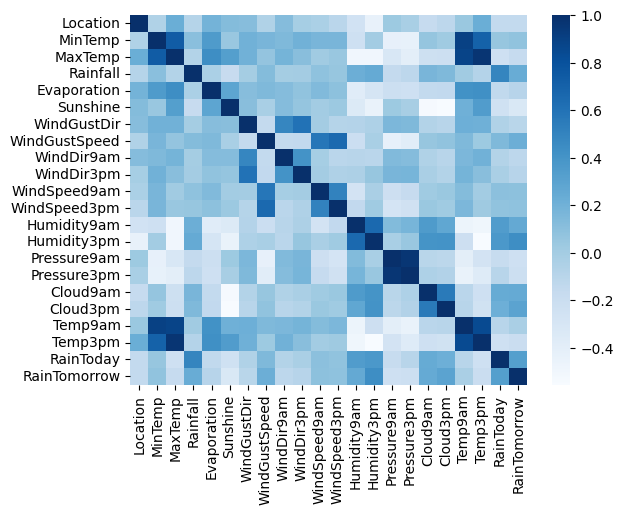

In [28]:
#locating Correlation between the data
import seaborn as sns
sns.heatmap(df.corr(), cmap="Blues")

#**Train Test Split**

In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,30,13.4,22.9,0.600000,6.14613,8.119032,4,44.000000,5,3,...,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.342194,16.900000,21.800000,0,0
1,30,7.4,25.1,0.000000,6.14613,8.119032,2,44.000000,0,6,...,44.000000,25.000000,1010.600000,1007.800000,4.129666,4.342194,17.200000,24.300000,0,0
2,30,12.9,25.7,0.000000,6.14613,8.119032,5,46.000000,5,6,...,38.000000,30.000000,1007.600000,1008.700000,4.129666,2.000000,21.000000,23.200000,0,0
3,30,9.2,28.0,0.000000,6.14613,8.119032,11,24.000000,13,14,...,45.000000,16.000000,1017.600000,1012.800000,4.129666,4.342194,18.100000,26.500000,0,0
4,30,17.5,32.3,1.000000,6.14613,8.119032,4,41.000000,12,0,...,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,6,21.9,26.1,0.000000,6.40000,8.200000,13,46.000000,14,15,...,75.000000,69.000000,1018.200000,1016.400000,7.000000,6.000000,24.200000,25.600000,0,0
21896,6,22.0,27.0,0.000000,4.00000,4.000000,13,48.000000,14,15,...,79.000000,82.000000,1015.900000,1014.300000,7.000000,7.000000,25.400000,25.000000,0,1
21897,6,22.9,28.0,3.400000,3.80000,2.000000,14,37.000000,15,13,...,89.000000,77.000000,1014.700000,1014.000000,7.000000,7.000000,25.100000,27.000000,1,1
21898,6,22.2,26.9,4.200000,5.20000,10.700000,15,43.000000,15,15,...,80.000000,69.000000,1015.900000,1014.500000,4.000000,6.000000,25.200000,25.200000,1,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

#**Prediction**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8502283105022831


In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred = le2.inverse_transform(y_pred)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
19660,13,9.9,15.900000,13.6,6.14613,8.119032,15,80.000000,10,13,...,19.000000,91.0,78.000000,1027.800000,1025.600000,4.129666,4.342194,12.3,14.600000,1
14582,42,13.8,34.700000,0.0,12.00000,8.119032,1,43.000000,15,3,...,26.000000,27.0,16.000000,1007.900000,1005.500000,0.000000,0.000000,22.7,33.300000,0
640,30,10.0,16.800000,0.8,6.14613,8.119032,10,33.000000,8,4,...,9.000000,92.0,68.000000,1016.500000,1016.000000,7.000000,5.000000,10.9,16.100000,0
17925,19,19.0,24.226283,4.4,6.14613,8.119032,4,37.645461,2,9,...,16.595953,70.0,51.306894,1018.240573,1015.593404,6.000000,4.342194,25.3,22.730533,1
19455,13,12.7,20.100000,1.0,6.14613,8.119032,10,48.000000,8,10,...,17.000000,71.0,57.000000,1032.800000,1029.600000,4.129666,4.342194,16.8,18.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,42,21.6,36.000000,0.0,48.40000,12.800000,11,43.000000,9,2,...,17.000000,55.0,27.000000,1016.600000,1011.900000,1.000000,3.000000,25.5,33.700000,0
8382,43,5.6,21.100000,0.0,3.40000,8.119032,3,31.000000,9,11,...,15.000000,48.0,23.000000,1026.600000,1022.700000,1.000000,0.000000,12.8,20.900000,0
4128,33,15.3,24.000000,1.0,6.14613,8.119032,14,22.000000,7,11,...,4.000000,79.0,72.000000,1018.800000,1016.300000,4.129666,4.342194,20.7,22.400000,0
16777,19,9.8,24.226283,0.0,6.14613,8.119032,4,37.645461,2,10,...,19.000000,54.0,51.000000,1018.240573,1015.593404,4.000000,2.000000,16.4,21.500000,0
